In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('data/')

['sample_submission.csv',
 'test_data.csv',
 'text_emotion.csv',
 'train_data.csv']

In [3]:
df = pd.read_csv('data/text_emotion.csv')
print (df.shape)
df.head()

(40000, 4)


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [39]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

Let's filter out the columns we require

In [4]:
cols = ['sentiment', 'content']
df = df[cols]

We will now run various feature extraction tools to get a good idea about our data.

### 1. Text Preprocessing

In [5]:
from text_utils.text_processing import process_text

process_text(df['content'].iloc[1])

'layin n bed headache ughhhh waitin call '

In [6]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('brown')
#nltk.download('averaged_perceptron_tagger')

### 2. Feature extraction

Setting up Vader NLP.
#### 2.1. Vader Sentiment Feature Extraction

In [7]:
#!pip install requests

In [9]:
#!pip install vaderSentiment

In [10]:
from text_utils.vader_feature_extraction import sentiment_analyzer_scores

In [11]:
sentiment_analyzer_scores(df['content'].iloc[0])

{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.5423}

#### 2.2. Textblob NLP Feature Extraction

In [12]:
#!pip install textblob

In [13]:
from text_utils.text_blob_feature_extraction import get_textblob_features
get_textblob_features(df['content'].iloc[1002])

{'Number of Noun Phrases': 1,
 'Number of POS tags': 11,
 'Sentence Polarity': -0.1,
 'Sentence Subjectivity': -0.1,
 'Number of words': 11,
 'Language Detected': 'en'}

#### 2.3. spaCy Feature Extraction
Ref. https://spacy.io/usage/spacy-101

In [14]:
#!pip install spacy

In [15]:
from text_utils.spacy_feature_extraction import get_entities

In [16]:
#import spacy
#!python -m spacy download en_core_web_sm

In [18]:
get_entities(process_text(df['content'].iloc[110]))

{'DATE': 'weekend'}

#### 2.4. afinn Sentiment score

In [20]:
#!pip install afinn

In [40]:
from afinn import Afinn
afinn = Afinn()

def afinn_score(sentence):
    return afinn.score(sentence)

#### 2.5. TF-IDF Feature Extraction

In [71]:
## Processing the text for NLP
df['processed_sentence'] = df['content'].apply(lambda x: process_text(x))

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['processed_sentence'])

In [73]:
df['processed_sentence'].iloc[0]

'know listenin bad habit earlier started freakin part '

In [81]:
x = x.astype(int)

In [82]:
tf_idf_array = x.toarray()
tf_idf_array.shape

(39771, 29993)

In [83]:
tf_idf_cols = [i for i in range(0,1000)]

In [84]:
tf_idf_df = pd.DataFrame(tf_idf_array)[tf_idf_cols]

In [85]:
tf_idf_df = tf_idf_df.reset_index()
tf_idf_df.head()

,index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df = df.reset_index()
df.head()

,level_0,index,sentiment,content,processed_sentence,String_Length,vader_neg,vader_neu,vader_pos,vader_compound,afinn score,Encoded Targets
0,0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,53,0.333,0.667,0.000,-0.5423,-3.0,2
1,1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,40,0.000,1.000,0.000,0.0000,-2.0,10
2,2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,31,0.672,0.328,0.000,-0.4767,-3.0,10
3,3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,22,0.000,0.308,0.692,0.5423,2.0,3
4,4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,38,0.000,0.794,0.206,0.0772,1.0,8


In [87]:
result = df.merge(tf_idf_df, on='index')

In [32]:
result.to_csv('data/tf_idf_data.csv')

#### 3.1. Processing the sentence

In [41]:
## Processing the text for NLP
df['processed_sentence'] = df['content'].apply(lambda x: process_text(x))

#### 2.6. Vectorize Sentence

In [36]:
#!pip install gensim

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument, Word2VecKeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2VecKeyedVectors
word2vecModel = Word2VecKeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin',binary=True)

def word_to_vec_generation(sent):
    word_to_vec_value = 0
    for word in sent.split(' '):
        try:
            word_to_vec_value += word2vecModel.word_vec(word)
        except:
            pass
        
    return word_to_vec_value

In [228]:
len(word_to_vec_generation("I am positive and confident"))

300

In [55]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
#model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
model = Word2Vec(df['processed_sentence'], min_count=1)

In [33]:
def sent_vectorizer(sent, model=model):
    sent_vec = np.zeros(400)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))

You can also download Google’s pre-trained KeyedVectors instance from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [ ]:
from text_utils.vectorized_feature_extraction import word_to_vec_generator

ERROR! Session/line number was not unique in database. History logging moved to new session 817


In [190]:
word2vec_dict = dict(word_to_vec_matrix)

In [ ]:
pd.DataFrame.from_dict(word_to_vec_generation("I am positive and confident")).T

In [211]:
vector_df = pd.DataFrame.from_dict(word2vec_dict).T

In [213]:
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.732452,0.334229,0.041931,1.127319,-0.543579,0.623535,0.225830,0.089233,0.010010,0.634766,...,0.136353,0.716064,-0.833984,0.019043,-0.964111,-0.914551,-0.046997,0.033203,0.288689,0.014404
1,0.416809,-0.072632,0.142395,0.669678,0.147247,-0.625793,0.644409,-0.916504,0.054077,1.186768,...,0.026245,0.881958,-0.459880,-0.206543,-0.295959,-1.415039,-0.945801,-0.119263,0.065437,0.718628
2,0.239258,0.264038,0.050049,0.115112,0.391113,-0.896271,0.286377,-0.540039,0.536133,0.519135,...,0.415527,-0.335754,-0.590576,0.402786,0.045166,-0.076660,-1.013916,-0.085327,0.336914,0.074219
3,0.325195,-0.148193,0.141113,0.354492,-0.232178,0.279602,0.336609,-0.078918,0.229843,0.110168,...,-0.081543,0.841797,-0.323853,-0.526367,0.043076,-0.348389,0.072933,-0.796387,0.424072,-0.353271
4,0.473877,0.000977,-0.079681,0.543701,0.084473,0.193359,0.000977,-0.173920,-0.229004,0.180908,...,0.470093,0.607849,0.026611,-0.168457,0.058105,-0.329346,0.307129,-0.805908,-0.022095,-0.410255


In [214]:
final_vector_df = vector_df.join(df['sentiment'])

In [215]:
final_vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,sentiment
0,0.732452,0.334229,0.041931,1.127319,-0.543579,0.623535,0.225830,0.089233,0.010010,0.634766,...,0.716064,-0.833984,0.019043,-0.964111,-0.914551,-0.046997,0.033203,0.288689,0.014404,empty
1,0.416809,-0.072632,0.142395,0.669678,0.147247,-0.625793,0.644409,-0.916504,0.054077,1.186768,...,0.881958,-0.459880,-0.206543,-0.295959,-1.415039,-0.945801,-0.119263,0.065437,0.718628,sadness
2,0.239258,0.264038,0.050049,0.115112,0.391113,-0.896271,0.286377,-0.540039,0.536133,0.519135,...,-0.335754,-0.590576,0.402786,0.045166,-0.076660,-1.013916,-0.085327,0.336914,0.074219,sadness
3,0.325195,-0.148193,0.141113,0.354492,-0.232178,0.279602,0.336609,-0.078918,0.229843,0.110168,...,0.841797,-0.323853,-0.526367,0.043076,-0.348389,0.072933,-0.796387,0.424072,-0.353271,enthusiasm
4,0.473877,0.000977,-0.079681,0.543701,0.084473,0.193359,0.000977,-0.173920,-0.229004,0.180908,...,0.607849,0.026611,-0.168457,0.058105,-0.329346,0.307129,-0.805908,-0.022095,-0.410255,neutral


In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(final_vector_df['sentiment'])
final_vector_df['Encoded Targets'] = le.transform(final_vector_df['sentiment'])

In [222]:
from sklearn.model_selection import train_test_split

X_vec = final_vector_df[vector_df.columns.values]
y_vec = final_vector_df['Encoded Targets']

X_vec_train, X_vec_test, y_vec_train, y_vec_test = train_test_split(X_vec, y_vec)

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rf_clf = RandomForestClassifier()

In [225]:
rf_clf.fit(X_vec_train, y_vec_train)

C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [226]:
rf_clf.score(X_vec_test, y_vec_test)

0.2476

#### 2.7. Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)

In [16]:
cv.fit(df['processed_sentence'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
X_vec = cv.transform(df['processed_sentence'])

In [18]:
vectorized_dataframe = pd.DataFrame(X_vec.todense())

In [19]:
vectorized_dataframe.shape

(40000, 29993)

In [20]:
vector_columns = ['vector_' + str(i) for i in range(0,vectorized_dataframe.shape[1])]

In [21]:
vectorized_dataframe.columns =  vector_columns

In [23]:
vectorized_dataframe = vectorized_dataframe.reset_index()

In [24]:
vectorized_dataframe.to_csv('data/vectorized_data.csv')

#### 2.8. N-Gram Vectorization

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))

In [91]:
ngram_vectorizer.fit(df['processed_sentence'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [92]:
X_ngram_vec = ngram_vectorizer.transform(df['processed_sentence'])

In [102]:
y = df[target]

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_ngram_vec, y, train_size = 0.75
)

In [104]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
lr.score(X_val, y_val)

0.17597765363128492

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
print (classification_report(lr.predict(X_val), y_val))

              precision    recall  f1-score   support

           0       0.07      0.20      0.11        10
           1       0.38      0.43      0.41        23
           2       0.09      0.10      0.10        29
           3       0.24      0.19      0.21        37
           4       0.23      0.33      0.27        21
           5       0.08      0.11      0.09        18
           6       0.35      0.38      0.37        29
           7       0.25      0.24      0.24        25
           8       0.21      0.11      0.14        46
           9       0.17      0.17      0.17        29
          10       0.11      0.04      0.06        48
          11       0.05      0.11      0.07        19
          12       0.04      0.04      0.04        24

    accuracy                           0.18       358
   macro avg       0.18      0.19      0.18       358
weighted avg       0.18      0.18      0.17       358



In [108]:
print (confusion_matrix(lr.predict(X_val), y_val))

[[ 2  0  2  0  1  0  0  0  1  1  0  3  0]
 [ 1 10  0  1  1  0  1  0  0  0  3  1  5]
 [ 0  2  3  5  3  3  1  1  0  2  3  6  0]
 [ 3  2  1  7  2  5  2  3  3  3  1  2  3]
 [ 1  0  1  1  7  2  1  1  2  1  1  3  0]
 [ 1  0  4  0  1  2  2  2  1  1  0  3  1]
 [ 2  1  2  3  2  1 11  1  0  1  3  2  0]
 [ 1  0  2  1  1  4  1  6  1  3  0  4  1]
 [ 7  3  6  4  3  2  3  1  5  5  2  2  3]
 [ 2  4  3  1  1  1  3  2  3  5  3  0  1]
 [ 4  3  4  1  6  2  5  3  6  3  2  4  5]
 [ 2  0  1  2  0  3  0  2  1  3  0  2  3]
 [ 2  1  4  3  2  1  1  2  1  1  0  5  1]]


In [109]:
df['sentiment'].value_counts()

hate          110
anger         110
surprise      110
empty         110
boredom       110
love          110
enthusiasm    110
neutral       110
sadness       110
happiness     110
fun           110
worry         110
relief        110
Name: sentiment, dtype: int64

### 3. Preparing Training Data

In [42]:
df.head()

,index,sentiment,content,processed_sentence
0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call
2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one


Getting the String Length

In [43]:
df['String_Length'] =  df['processed_sentence'].apply(lambda x: len(x))

In [44]:
df = df[df['String_Length']>3]

In [45]:
df['String_Length'].max()

134

#### 3.2. Vader Sentiment Extraction

In [46]:
## Vader Sentiment Feature Extraction

df['vader_neg'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['neg'])
df['vader_neu'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['neu'])
df['vader_pos'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['pos'])
df['vader_compound'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['compound'])

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryi

#### 3.3. TextBlob Feature Extraction

In [37]:
get_textblob_features(df['content'].iloc[1002])

{'Number of Noun Phrases': 1,
 'Number of POS tags': 6,
 'Sentence Polarity': -0.1,
 'Sentence Subjectivity': -0.1,
 'Number of words': 6,
 'Language Detected': 'en'}

In [88]:
## TextBlob Feature Extraction
'''
#try:
df['Number of Noun Phrases'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of Noun Phrases'])
df['Number of POS tags'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of POS tags'])
df['Sentence Polarity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Polarity'])
df['Sentence Subjectivity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Subjectivity'])
df['Number of words'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of words'])
#except:
#    pass
'''

"\n#try:\ndf['Number of Noun Phrases'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of Noun Phrases'])\ndf['Number of POS tags'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of POS tags'])\ndf['Sentence Polarity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Polarity'])\ndf['Sentence Subjectivity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Subjectivity'])\ndf['Number of words'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of words'])\n#except:\n#    pass\n"

TextBlob accepts strings with minimum 3 characters.

#### 3.4. Afinn Score

In [47]:
df['afinn score'] = df['processed_sentence'].apply(lambda x: afinn_score(x))

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df.head()

,index,sentiment,content,processed_sentence,String_Length,vader_neg,vader_neu,vader_pos,vader_compound,afinn score
0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,53,0.333,0.667,0.000,-0.5423,-3.0
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,40,0.000,1.000,0.000,0.0000,-2.0
2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,31,0.672,0.328,0.000,-0.4767,-3.0
3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,22,0.000,0.308,0.692,0.5423,2.0
4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,38,0.000,0.794,0.206,0.0772,1.0


### 4. Preparing Data for Training
#### 4.1. Encoding String/ Categorical Data

In [49]:
df.head()

,index,sentiment,content,processed_sentence,String_Length,vader_neg,vader_neu,vader_pos,vader_compound,afinn score
0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,53,0.333,0.667,0.000,-0.5423,-3.0
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,40,0.000,1.000,0.000,0.0000,-2.0
2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,31,0.672,0.328,0.000,-0.4767,-3.0
3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,22,0.000,0.308,0.692,0.5423,2.0
4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,38,0.000,0.794,0.206,0.0772,1.0


In [50]:
df.columns.values

array(['index', 'sentiment', 'content', 'processed_sentence',
       'String_Length', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'afinn score'], dtype=object)

In [51]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sentiment'])
df['Encoded Targets'] = le.transform(df['sentiment'])

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
le.fit(df['sentiment'])

LabelEncoder()

In [54]:
le.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [55]:
df['Encoded Targets'] = le.transform(df['sentiment'])
#result['Encoded Targets'] = le.transform(result['sentiment'])

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
print (df['Encoded Targets'].unique())
#print (result['Encoded Targets'].unique())

[ 2 10  3  8 12 11  7  4  6  5  1  9  0]


In [89]:
result.head()

,level_0,index,sentiment,content,processed_sentence,String_Length,vader_neg,vader_neu,vader_pos,vader_compound,...,990,991,992,993,994,995,996,997,998,999
0,0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,53,0.333,0.667,0.000,-0.5423,...,0,0,0,0,0,0,0,0,0,0
1,1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,40,0.000,1.000,0.000,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,31,0.672,0.328,0.000,-0.4767,...,0,0,0,0,0,0,0,0,0,0
3,3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,22,0.000,0.308,0.692,0.5423,...,0,0,0,0,0,0,0,0,0,0
4,4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,38,0.000,0.794,0.206,0.0772,...,0,0,0,0,0,0,0,0,0,0


#### 4.2. Defining Dependent and Independent Variables

In [88]:
vader_features = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']
tf_idf_features = tf_idf_cols
afinn_features = ['afinn score']
target = ['Encoded Targets']

In [102]:
X = result[vader_features+afinn_features]
y = result[target]

### Resample the Data Using  SMOTE and Tomek Links

In [135]:
import matplotlib.pyplot as plt
import random

number_of_colors = 8

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#93FE3F', '#9B0D6E', '#1E2A37', '#1B9B32', '#242E58', '#593568', '#2B812F', '#C94DE1']


In [136]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [151]:
import matplotlib.pyplot as plt

def plot_2d_space(X, y, label='Classes'): 
    
    number_of_colors = len(np.unique(y))

    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    #colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        print (l, c)
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70255 new random picked points
(109798, 5) (39543, 5)
0 #FAD2C8
1 #A2FB3C


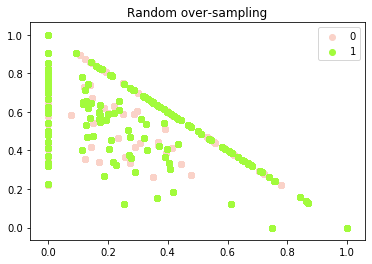

In [152]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print (X_ros.shape, X.shape)

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [133]:
pd.Series(y_ros).value_counts()

12    8446
11    8446
10    8446
9     8446
8     8446
7     8446
6     8446
5     8446
4     8446
3     8446
2     8446
1     8446
0     8446
dtype: int64

In [104]:
#X_result = result[tf_idf_features+vader_features+afinn_features]
#y_result = result[target]

### 5. Start the Machine Learning Classification
#### 5.1. On Vader Features

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82348, 5), (27450, 5), (82348,), (27450,))

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [128]:
rf_clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
X_smt.shape[0]- X.shape[0]

8336

In [130]:
rf_clf.score(X_test, y_test)

0.5307832422586521

In [131]:
print (classification_report(rf_clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1994
           1       0.78      0.86      0.82      1940
           2       0.47      0.62      0.54      1632
           3       0.61      0.62      0.62      2077
           4       0.59      0.60      0.60      2023
           5       0.37      0.51      0.43      1522
           6       0.73      0.75      0.74      2048
           7       0.57      0.61      0.59      1979
           8       0.48      0.15      0.23      6751
           9       0.52      0.65      0.58      1755
          10       0.40      0.55      0.46      1485
          11       0.46      0.69      0.55      1394
          12       0.14      0.34      0.19       850

    accuracy                           0.53     27450
   macro avg       0.53      0.60      0.55     27450
weighted avg       0.55      0.53      0.51     27450



In [134]:
rf_clf.feature_importances_

array([0.15579783, 0.24442875, 0.1969259 , 0.25487947, 0.14796805])

In [132]:
print (confusion_matrix(rf_clf.predict(X_test), y_test))

[[1636   31   39   30   30   30   40   17   27   39   24   25   26]
 [   0 1664   35   23   18   26   35    8   29   23   28   14   37]
 [   0    0 1016   54   39   53   38   41   82   60   75   81   93]
 [   0    0   43 1294   86  103   46   89  100   84   75   75   82]
 [   0    0   22   46 1223  140   21  108  118  100   56   79  110]
 [   0    0   23   47   51  775    6  141  133   60   90   48  148]
 [   0   17   24    9   26   23 1533   19   77   33  109   38  140]
 [   0    0   23   21   46  226   16 1202  104   63   71   76  131]
 [ 463  411  850  542  447  418  289  248 1004  477  442  553  607]
 [   0    0   35   31   51  123   10   77   96 1143   53   40   96]
 [   0    0   19    0   11   50   26   52  121   27  821   59  299]
 [   0    0   13    7   43   50   28   56   62   40   39  967   89]
 [   0    0   15   16   15   67   19   36  140   29  177   44  292]]


#### 5.2. On TF-IDF Features

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_result,y_result)

In [137]:
X_res_train.shape, X_res_test.shape, y_res_train.shape, y_res_test.shape

((1065, 1005), (356, 1005), (1065, 1), (356, 1))

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [139]:
rf_clf.fit(X_res_train, y_res_train)

C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Tanush Pas\AppData\Local\conda\conda\envs\PDF\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
rf_clf.score(X_res_test, y_res_test)

0.1404494382022472

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [142]:
lr = AdaBoostClassifier(base_estimator=LogisticRegression())

In [ ]:
lr.fit(X_res_train, y_res_train)

In [144]:
lr.score(X_res_test, y_res_test)

0.1151685393258427